# Laboratorio 6 - Análisis de Redes Sociales

In [2]:
import pandas as pd

bernardo = pd.read_csv('./data/bernardoArevalo.csv')
sandra = pd.read_csv('./data/sandraTorres.csv')
trafico = pd.read_csv('./data/traficogt.csv')

In [3]:
bernardo.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1702109621899407575,1702109621899407575,https://twitter.com/eltuitdehoy_/status/170210...,2023-09-13 23:58:52+00:00,"{'id': 46561608, 'id_str': '46561608', 'url': ...",es,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,0,0,...,NaN,NaN,NaN,1.702089e+18,"{'id': 1419402501212811265, 'username': 'AnonG...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1702109505947865192,1702109505947865192,https://twitter.com/totitafuentes/status/17021...,2023-09-13 23:58:24+00:00,"{'id': 1005627722, 'id_str': '1005627722', 'ur...",es,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,0,1,...,NaN,NaN,NaN,1.702056e+18,"{'id': 291888009, 'username': 'ASIERVERA', 'di...","<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",2,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1702109134387134664,1702109134387134664,https://twitter.com/Fernand0483/status/1702109...,2023-09-13 23:56:55+00:00,"{'id': 1512621569834688513, 'id_str': '1512621...",es,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,0,0,...,NaN,NaN,NaN,1.701799e+18,"{'id': 84055675, 'username': 'VicZacariasGT', ...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1702108943495926143,1702108943495926143,https://twitter.com/MaxTiger502/status/1702108...,2023-09-13 23:56:10+00:00,"{'id': 891058586, 'id_str': '891058586', 'url'...",es,@Igor_Bitkov No le sigan el juego a este ruso ...,1,0,...,NaN,NaN,NaN,1.701898e+18,"{'id': 707086237753090048, 'username': 'Igor_B...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


In [4]:
sandra.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701686249797345422,1701686249797345422,https://twitter.com/Yeya16155804/status/170168...,2023-09-12 19:56:32+00:00,"{'id': 1213902343311245313, 'id_str': '1213902...",es,@bernardosilvagt @BArevalodeLeon @DrGiammattei...,0,0,...,NaN,NaN,NaN,1.701683e+18,"{'id': 3337026291, 'username': 'bernardosilvag...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701686065361215632,1701686065361215632,https://twitter.com/Palomin17772524/status/170...,2023-09-12 19:55:48+00:00,"{'id': 1420560045323038720, 'id_str': '1420560...",es,@_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...,0,0,...,NaN,NaN,NaN,1.701685e+18,"{'id': 390988524, 'username': '_awskl', 'displ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701176209076609121,1701176209076609121,https://twitter.com/iRizhao/status/17011762090...,2023-09-11 10:09:49+00:00,"{'id': 1533663614770421761, 'id_str': '1533663...",en,The 2023 National Race Walking Championship &a...,5,34,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1701684889081307215,1701684889081307215,https://twitter.com/_awskl/status/170168488908...,2023-09-12 19:51:07+00:00,"{'id': 390988524, 'id_str': '390988524', 'url'...",es,@Palomin17772524 @mjcabrerar @BArevalodeLeon @...,1,0,...,NaN,NaN,NaN,1.701684e+18,"{'id': 1420560045323038720, 'username': 'Palom...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
4,4,1701684719815970972,1701684719815970972,https://twitter.com/Mr_andrew89/status/1701684...,2023-09-12 19:50:27+00:00,"{'id': 454924874, 'id_str': '454924874', 'url'...",es,@ASolaresM @Mike051270 @BArevalodeLeon Otro es...,0,0,...,NaN,NaN,NaN,1.701329e+18,"{'id': 310913844, 'username': 'ASolaresM', 'di...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


In [5]:
trafico.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701654244858679742,1701654244858679742,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-12 17:49:21+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",1,2,...,"{'id': 1701651855212691764, 'id_str': '1701651...",NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701651855212691764,1701651855212691764,https://twitter.com/amilcarmontejo/status/1701...,2023-09-12 17:39:52+00:00,"{'id': 372126670, 'id_str': '372126670', 'url'...",es,CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...,149,78,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
2,2,1701348453916311903,1701348453916311903,https://twitter.com/edgarduarteagui/status/170...,2023-09-11 21:34:15+00:00,"{'id': 100815432, 'id_str': '100815432', 'url'...",es,Camión de arena volteado en el viaducto el pul...,2,1,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
3,3,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",3,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1701216420997017888,1701216420997017888,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-11 12:49:36+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet


In [6]:
import string
import re
import nltk
from nltk.corpus import stopwords

def remove_urls(text):
    # Eliminar URLs que comienzan con http o https
    text = re.sub(r'http\S+', '', text)
    # Eliminar URLs que comienzan con www
    text = re.sub(r'www\S+', '', text)
    return text

bernardo['rawContent'] = bernardo['rawContent'].apply(remove_urls)
sandra['rawContent'] = sandra['rawContent'].apply(remove_urls)
trafico['rawContent'] = trafico['rawContent'].apply(remove_urls)


# Eliminar caracteres especiales como #, @, &, y apóstrofes.
bernardo['rawContent'] = bernardo['rawContent'].str.replace('[{}]'.format(string.punctuation), '')
sandra['rawContent'] = sandra['rawContent'].str.replace('[{}]'.format(string.punctuation), '')
trafico['rawContent'] = trafico['rawContent'].str.replace('[{}]'.format(string.punctuation), '')

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"  
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", text)

bernardo['rawContent'] = bernardo['rawContent'].apply(remove_emojis)
sandra['rawContent'] = sandra['rawContent'].apply(remove_emojis)
trafico['rawContent'] = trafico['rawContent'].apply(remove_emojis)

nltk.download('stopwords')

stopwordsES = stopwords.words('spanish')
stopwordsEN = stopwords.words('english')

def remove_stopwords(text):
    words = text.split()
    clean_words = [word for word in words if word not in stopwordsES]
    clean_words = [word for word in clean_words if word not in stopwordsEN]
    return " ".join(clean_words)

bernardo['rawContent'] = bernardo['rawContent'].apply(remove_stopwords)
sandra['rawContent'] = sandra['rawContent'].apply(remove_stopwords)
trafico['rawContent'] = trafico['rawContent'].apply(remove_stopwords)

# Convertir a mayúsculas
bernardo['rawContent'] = bernardo['rawContent'].str.upper()
sandra['rawContent'] = sandra['rawContent'].str.upper()
trafico['rawContent'] = trafico['rawContent'].str.upper()




C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_19304\2482464058.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  bernardo['rawContent'] = bernardo['rawContent'].str.replace('[{}]'.format(string.punctuation), '')
C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_19304\2482464058.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  sandra['rawContent'] = sandra['rawContent'].str.replace('[{}]'.format(string.punctuation), '')
C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_19304\2482464058.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  trafico['rawContent'] = trafico['rawContent'].str.replace('[{}]'.format(string.punctuation), '')
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juan_Avila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print(bernardo['rawContent'].head())
print(sandra['rawContent'].head())
print(trafico['rawContent'].head())

0    ANONGTRELOADED MSEMILLAGT BAREVALODELEON JAJAJ...
1    ASIERVERA AZTECANOTICIAGT BAREVALODELEON DOS V...
2    PACIENTE 39 AÑOS DOLOR LUMBAR 1 AÑO TRAS CAÍDA...
3    VICZACARIASGT SOY502 BAREVALODELEON MSEMILLAGT...
4    IGORBITKOV NO SIGAN JUEGO RUSO INVASOR ENERO S...
Name: rawContent, dtype: object
0    BERNARDOSILVAGT BAREVALODELEON DRGIAMMATTEI ME...
1    AWSKL MJCABRERAR BAREVALODELEON TSEGUATEMALA D...
2    THE 2023 NATIONAL RACE WALKING CHAMPIONSHIP AM...
3    PALOMIN17772524 MJCABRERAR BAREVALODELEON TSEG...
4    ASOLARESM MIKE051270 BAREVALODELEON OTRO ESTUP...
Name: rawContent, dtype: object
0    AHORA AMÍLCAR MONTEJO DIRECTOR COMUNICACIÓN EM...
1    CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...
2    CAMIÓN ARENA VOLTEADO VIADUCTO PULTÉ HACIA HAC...
3    PACIENTE 39 AÑOS DOLOR LUMBAR 1 AÑO TRAS CAÍDA...
4    AHORA AMÍLCAR MONTEJO DIRECTOR COMUNICACIÓN EM...
Name: rawContent, dtype: object


In [8]:
bernardo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4212 non-null   int64  
 1   id                4212 non-null   int64  
 2   id_str            4212 non-null   int64  
 3   url               4212 non-null   object 
 4   date              4212 non-null   object 
 5   user              4212 non-null   object 
 6   lang              4212 non-null   object 
 7   rawContent        4212 non-null   object 
 8   replyCount        4212 non-null   int64  
 9   retweetCount      4212 non-null   int64  
 10  likeCount         4212 non-null   int64  
 11  quoteCount        4212 non-null   int64  
 12  conversationId    4212 non-null   int64  
 13  hashtags          4212 non-null   object 
 14  cashtags          4212 non-null   object 
 15  mentionedUsers    4212 non-null   object 
 16  links             4212 non-null   object 


In [9]:
sandra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5784 entries, 0 to 5783
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5784 non-null   int64  
 1   id                5784 non-null   int64  
 2   id_str            5784 non-null   int64  
 3   url               5784 non-null   object 
 4   date              5784 non-null   object 
 5   user              5784 non-null   object 
 6   lang              5784 non-null   object 
 7   rawContent        5784 non-null   object 
 8   replyCount        5784 non-null   int64  
 9   retweetCount      5784 non-null   int64  
 10  likeCount         5784 non-null   int64  
 11  quoteCount        5784 non-null   int64  
 12  conversationId    5784 non-null   int64  
 13  hashtags          5784 non-null   object 
 14  cashtags          5784 non-null   object 
 15  mentionedUsers    5784 non-null   object 
 16  links             5784 non-null   object 


In [10]:
trafico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12631 entries, 0 to 12630
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        12631 non-null  int64  
 1   id                12631 non-null  int64  
 2   id_str            12631 non-null  int64  
 3   url               12631 non-null  object 
 4   date              12631 non-null  object 
 5   user              12631 non-null  object 
 6   lang              12631 non-null  object 
 7   rawContent        12631 non-null  object 
 8   replyCount        12631 non-null  int64  
 9   retweetCount      12631 non-null  int64  
 10  likeCount         12631 non-null  int64  
 11  quoteCount        12631 non-null  int64  
 12  conversationId    12631 non-null  int64  
 13  hashtags          12631 non-null  object 
 14  cashtags          12631 non-null  object 
 15  mentionedUsers    12631 non-null  object 
 16  links             12631 non-null  object

## Problema 1

C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_19304\4075061463.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = trafico.corr()


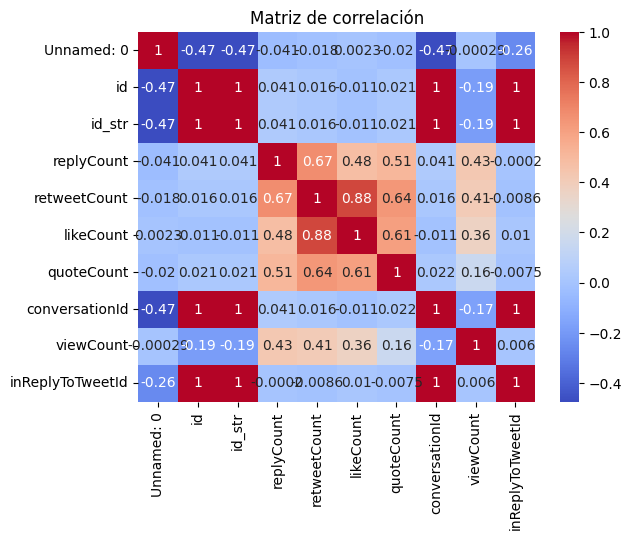

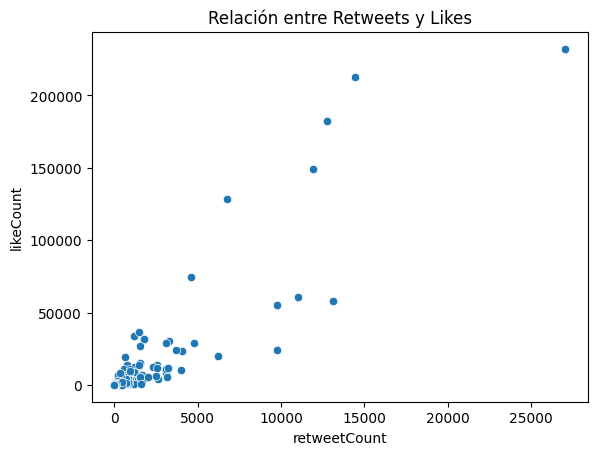

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = trafico.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


sns.scatterplot(data=trafico, x='retweetCount', y='likeCount')
plt.title("Relación entre Retweets y Likes")
plt.show()


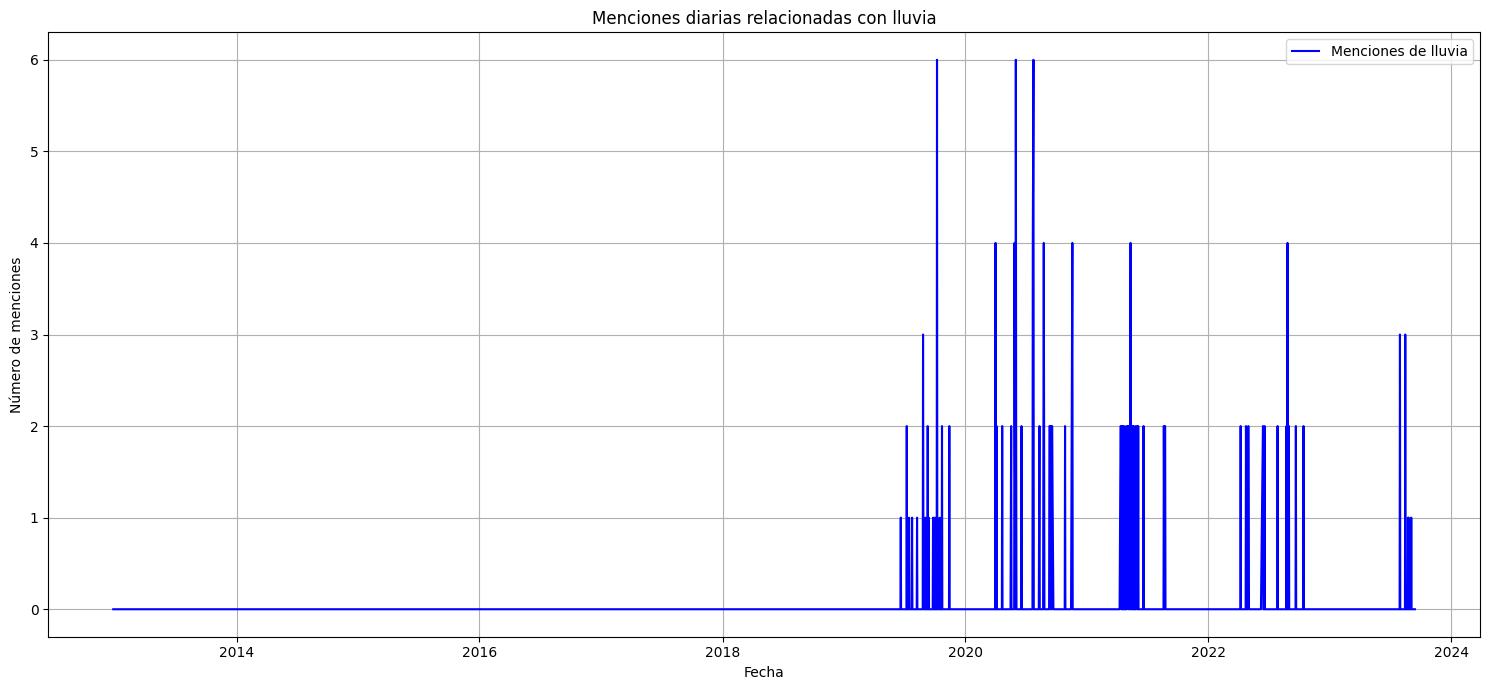

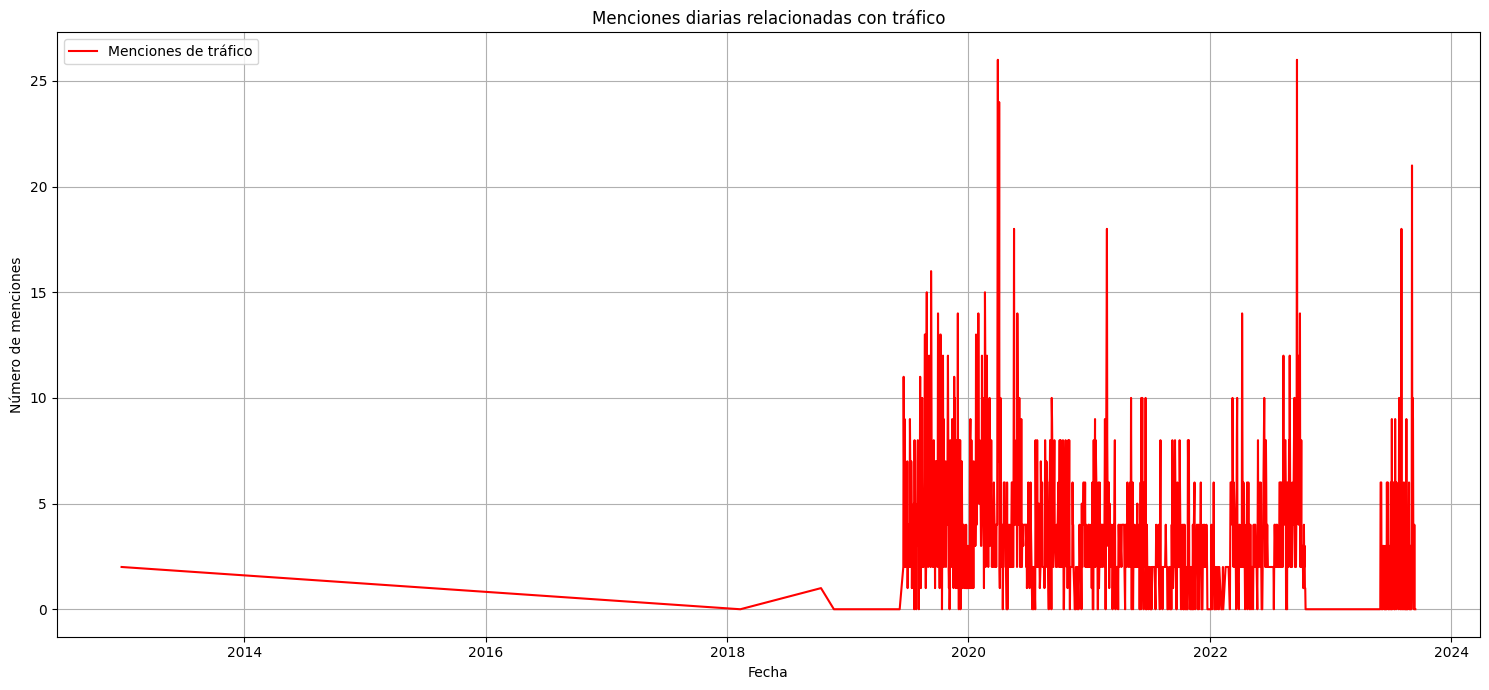

In [12]:

keyword_lluvia = ["LLUVIA", "LLOVIENDO", "MOJADO"]
keyword_trafico = ["TRAFICO", "CONGESTIÓN", "ATASCADO"]

trafico['lluvia'] = trafico['rawContent'].apply(lambda x: any(keyword in x for keyword in keyword_lluvia))
trafico['trafico'] = trafico['rawContent'].apply(lambda x: any(keyword in x for keyword in keyword_trafico))

daily_counts = trafico.groupby(trafico['date'].astype('datetime64').dt.date)[['lluvia', 'trafico']].sum()

# Graficar menciones de lluvia
plt.figure(figsize=(15, 7))
daily_counts['lluvia'].plot(label='Menciones de lluvia', color='blue')
plt.title('Menciones diarias relacionadas con lluvia')
plt.ylabel('Número de menciones')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar menciones de tráfico
plt.figure(figsize=(15, 7))
daily_counts['trafico'].plot(label='Menciones de tráfico', color='red')
plt.title('Menciones diarias relacionadas con tráfico')
plt.ylabel('Número de menciones')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



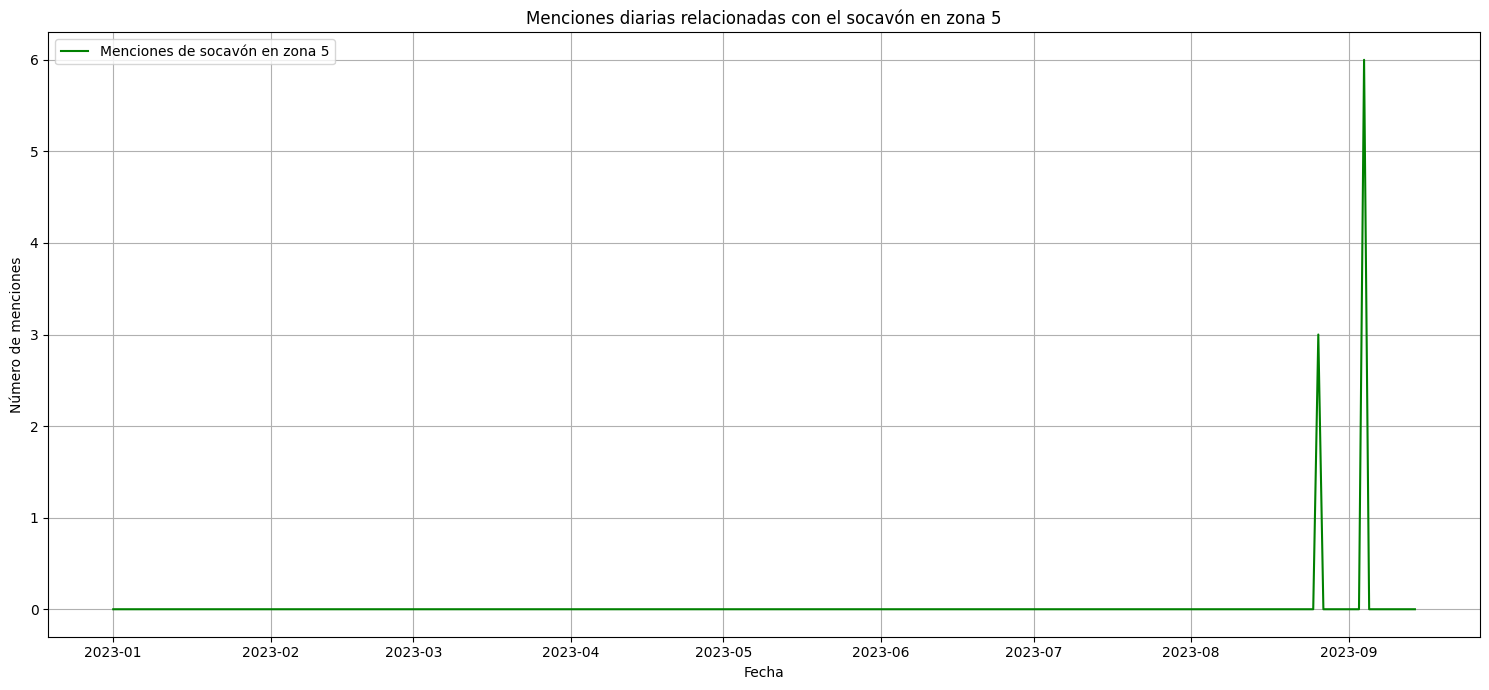

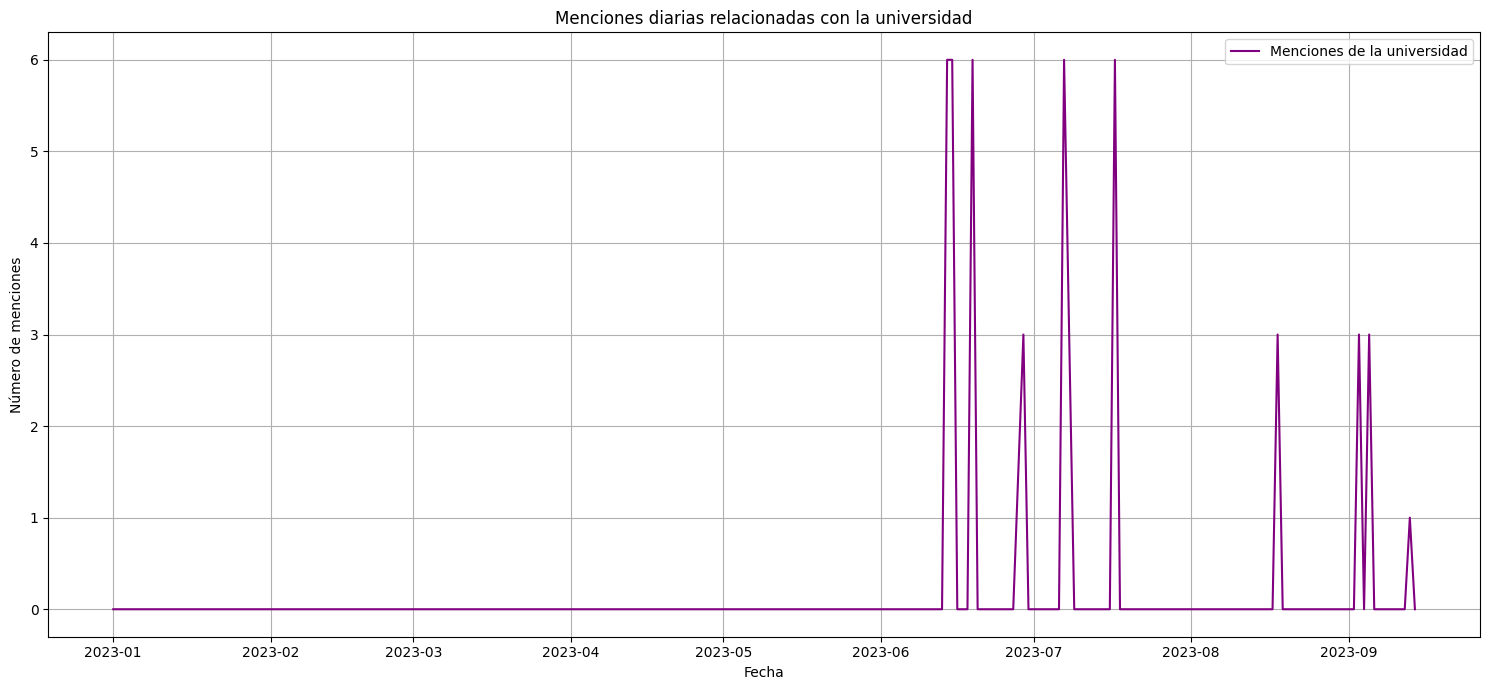

In [13]:
# Palabras clave relacionadas con el socavón y la universidad
keywords_sinkhole = ['SOCAVÓN', 'ZONA 5']
keywords_university = ['UVG', 'ZONA 16', 'LANDIVAR', 'ZONA 15']

# Identificar tweets que contienen esas palabras clave
trafico['sinkhole_related'] = trafico['rawContent'].apply(lambda x: any(keyword in x for keyword in keywords_sinkhole))
trafico['university_related'] = trafico['rawContent'].apply(lambda x: any(keyword in x for keyword in keywords_university))

# Contar tweets diarios relacionados con el socavón y la universidad
conteo_diario_2023 = trafico[trafico['date'].astype('datetime64').dt.year == 2023].groupby(trafico['date'].astype('datetime64').dt.date)[['sinkhole_related', 'university_related']].sum()
# Tomar solo los del 2023


# Graficar menciones de socavón
plt.figure(figsize=(15, 7))
conteo_diario_2023['sinkhole_related'].plot(label='Menciones de socavón en zona 5', color='green')
plt.title('Menciones diarias relacionadas con el socavón en zona 5')
plt.ylabel('Número de menciones')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Graficar menciones de la universidad
plt.figure(figsize=(15, 7))
conteo_diario_2023['university_related'].plot(label='Menciones de la universidad', color='purple')
plt.title('Menciones diarias relacionadas con la universidad')
plt.ylabel('Número de menciones')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Preguntas

***¿Cómo ha venido a complicar el tráfico en toda la ciudad la época de lluvia?***
Como se puede observar, al graficar las menciones de lluvia y luego las menciones de tráfico, ambas tienen bastantes coincidencias en menciones por lo que se puede concluir que aunque no en todos los casos la lluvia sí afecta a la ciudad en épocas de lluvia. Especialmente en los últimos meses del año como se puede observar en el gráfico de barras.

***¿El socavón de zona 5 ha tenido un impacto importante en el tráfico de la zona de la universidad?***

Como se puede observar, en las ultimas dos graficas las cuales muestran los tweets de la zona 5 y de la zona de la universidad, se puede observar que el socavon de la zona 5 si ha tenido un impacto importante en el trafico de la zona de la universidad, ya que en la grafica de la zona 5 se puede observar una gran cantidad de tweets en los ultimos meses en los cuales se han tenido lo problemas del socavón, y en la grafica de la zona de la universidad se puede observar que la cantidad de tweets sobre trafico aumenta en las mismas fechas, haciendo referencia a que el socavón si ha tenido un impacto importante en el trafico de la zona de la universidad.

## Problema 2

In [14]:
from textblob import TextBlob

def get_polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0.0

bernardo['polarity'] = bernardo['rawContent'].apply(get_polarity)

polaridad = bernardo['polarity'].mean()

print('Polaridad de los tweets de Bernardo: ', polaridad)

Polaridad de los tweets de Bernardo:  0.01938769243765174


Se puede observar que los tweets son más neutros que positivos y negativos, esto se puede deber a que la mayoría de tweets son de noticias y no de opiniones.

In [15]:
percentiles = bernardo[['retweetCount', 'likeCount', 'replyCount']].quantile(0.9).to_dict()
percentiles

influencer_tweets = bernardo[
    ((bernardo['retweetCount'] > percentiles['retweetCount']) +
     (bernardo['likeCount'] > percentiles['likeCount']) +
     (bernardo['replyCount'] > percentiles['replyCount'])) >= 2
]

influencer_users = influencer_tweets['user'].tolist()

unique_influencers = {}
for user_info in influencer_users:
    user_id = user_info['id']
    if user_id not in unique_influencers:
        unique_influencers[user_id] = {
            "username": user_info['username'],
            "displayname": user_info['displayname'],
            "url": user_info['url']
        }

influencer_df = pd.DataFrame(unique_influencers.values())
if influencer_df.empty:
    print("No hay influencers.")
else:
    print("Los influencers son:", influencer_df['username'].tolist())

No hay influencers.


Tras ver los resultados se puede concluir que no hay influencers, porque ninguno de los usuarios que cumplan con al menos 2 requisitos. Por lo tanto no se encuentran influencers.

In [16]:
direct_interactions = bernardo[bernardo['inReplyToUser'].apply(lambda x: isinstance(x, dict) and x['username'] == 'BArevalodeLeon')]

print("Número de interacciones directas con Bernardo:", len(direct_interactions))

indirect_interactions = bernardo[
    (bernardo['rawContent'].str.contains('BArevalodeLeon', case=False)) & 
    ~(bernardo['id'].isin(direct_interactions['id']))
]

print("Número de interacciones indirectas con Bernardo:", len(indirect_interactions))


Número de interacciones directas con Bernardo: 0
Número de interacciones indirectas con Bernardo: 2643


De este análilis se puede concluir que todas las interacciones con la cuenta de Bernardo Arévalo son neutras, que puede ser por que su contenido puede ser más inforamtivo que mostrando opiniones. Asimismo, las interacciones son indirectas es decir que no hay una conversación directa con el usuario sino que menciones a su cuenta.

In [17]:
from textblob import TextBlob


sandra['polarity'] = sandra['rawContent'].apply(get_polarity)

polaridad = sandra['polarity'].mean()

print('Polaridad de los tweets de Sandra: ', polaridad)

Polaridad de los tweets de Sandra:  0.014774158467660246


Se puede observar que la mayoría de tweets son neutros, esto se puede deber a que la mayoría de tweets son de noticias y no de opiniones al igual que con los datos anteriores.

In [18]:
percentiles = sandra[['retweetCount', 'likeCount', 'replyCount']].quantile(0.9).to_dict()
percentiles

influencer_tweets = sandra[
    ((sandra['retweetCount'] > percentiles['retweetCount']) +
     (sandra['likeCount'] > percentiles['likeCount']) +
     (sandra['replyCount'] > percentiles['replyCount'])) >= 2
]

influencer_users = influencer_tweets['user'].tolist()

unique_influencers = {}
for user_info in influencer_users:
    user_id = user_info['id']
    if user_id not in unique_influencers:
        unique_influencers[user_id] = {
            "username": user_info['username'],
            "displayname": user_info['displayname'],
            "url": user_info['url']
        }

influencer_df = pd.DataFrame(unique_influencers.values())
if influencer_df.empty:
    print("No hay influencers.")
else:
    print("Los influencers son:", influencer_df['username'].tolist())

No hay influencers.


Al igual que con los datos anteriores, se puede concluir que no hay influencers, porque ninguno de los usuarios que cumplan con al menos 2 requisitos. Por lo tanto no se encuentran influencers.

In [19]:
direct_interactions = sandra[sandra['inReplyToUser'].apply(lambda x: isinstance(x, dict) and x['username'] == 'SandraTorresGUA')]

print("Número de interacciones directas con Sandra:", len(direct_interactions))

indirect_interactions = sandra[
    (sandra['rawContent'].str.contains('SandraTorresGUA', case=False)) & 
    ~(sandra['id'].isin(direct_interactions['id']))
]

print("Número de interacciones indirectas con Sandra:", len(indirect_interactions))

Número de interacciones directas con Sandra: 0
Número de interacciones indirectas con Sandra: 852


Como se puede observar, tanto con Arevalo como con Sandra, las interacciones fueron indirectas indicando que su contenido era más informativo por el período de tiempo que está analziado. Asimismo no hay influencers en ninguno de los dos casos que cumplan con los requisitos, pero si pueden haber casos que personas con bastante seguidores compartieran este tipo de información. 

Tras haber reealizado todo el analisis de los datos sobre ambos candidatos se puede concluir que ambos tienen un contenido informativo y no de opiniones, esto con el fin de atraer a mayor cantidad de personas a sus cuentas. Pero realmente con la informacion que se tiene no se puede definir si las personas hayan sido influenciadas por los candidatos o por la informacion que ellos comparten. Pero si fue una de las meneras en las que ellos trataron de influenciar a las personas.